# Chapter 7: Decision Trees

## 7.1 Introduction


A decision tree id builded within the following constraints:

1. Have the minimum number of levels in the tree to limit the complexity of the tree
2. Have the maximum accuracy in classifying the labelled test data
3. Have the most generalization capability when applied to the unseen data

$\Rightarrow$ there is no single perfect approach that tackles all these constraints in best possible manner


## 7.2 Why Decision Trees?

- humanlike, intuitive behavior
- can work directly in non-numeric data
- can work directly with missing data
- scale easily from linear data to nonlinear data


### 7.2.1 Types of Decision Trees

Based on the application (classification or regression), there are some differences in how the trees are built.


## 7.3 Algorithms for Building Decision Trees

- **CART**: Classification and Regression Tree
- **ID3**: Iterative Dichotomiser 3
- **CHAID**: Chi-Squared Automatic Interaction Detector


## 7.4 Regression Tree

- designed to predict the value of a function at given coordinates
- input and output data s required to be strictly numerical
- number of rules, dimensions, termination -> algorithms needs to optimize these based on the desried error rate

Solving the problem to find the globally optimum regions to minimize the mean squared error is an NP-hard problem.

Greedy methods resulting in local minimums are employed
$\newline\Rightarrow$ large trees with overfitting
$\newline\Rightarrow$ pruning technique to find the optimal tradeoff that captures the most of the structure in the data without overfitting it
$\newline\Rightarrow$ squared error node impurity measure optimization

### 7.4.1 Implementing Regression Tree

sklearn.tree modul


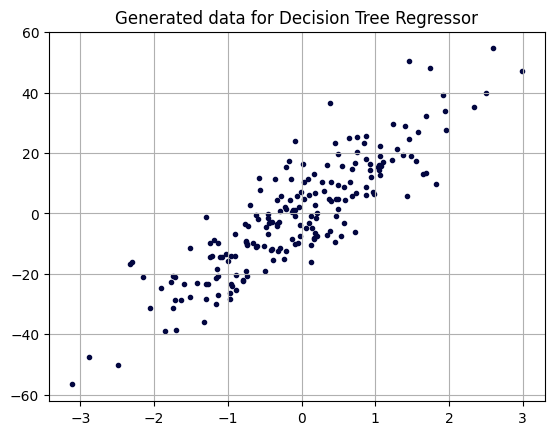

In [1]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

x, y = make_regression(n_samples=200, n_features=1, noise=10)  # generates a random regression problem
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x, y, color = "#020640", marker=".")
plt.title("Generated data for Decision Tree Regressor")
plt.grid(True)
plt.show()


In [5]:
dtr = DecisionTreeRegressor(max_depth=4)
dtr.fit(x, y)

DecisionTreeRegressor(max_depth=4)

In [7]:
y_pred = dtr.predict(x)
dtr.score(x, y)

0.8115896345419704

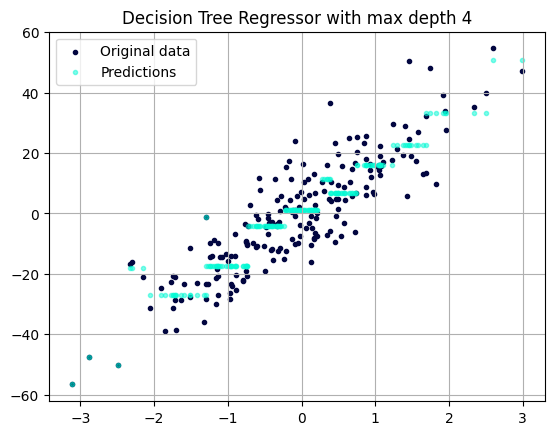

In [8]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x, y, color = "#020640", marker = ".", label = "Original data")
ax1.scatter(x, y_pred, color = "#05f9d4", marker=".", label = "Predictions", alpha = .5)
plt.title("Decision Tree Regressor with max depth 4")
plt.legend(loc = "upper left")
plt.grid(True) 
plt.show()

In [9]:
dtr_10 = DecisionTreeRegressor(max_depth=10)
dtr_10.fit(x, y)

DecisionTreeRegressor(max_depth=10)

In [10]:
y_pred_10 = dtr_10.predict(x)
dtr_10.score(x, y)

0.9726011600805051

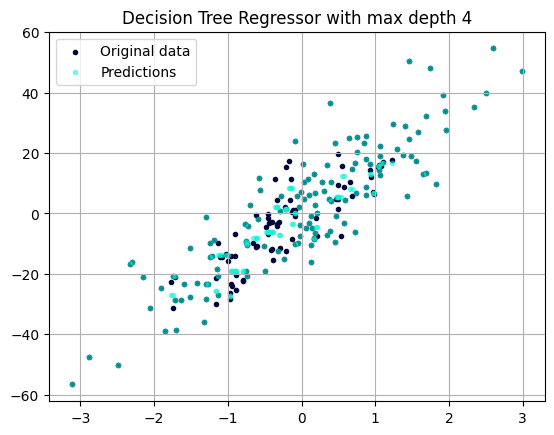

In [11]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x, y, color = "#020640", marker = ".", label = "Original data")
ax1.scatter(x, y_pred_10, color = "#05f9d4", marker=".", label = "Predictions", alpha = .5)
plt.title("Decision Tree Regressor with max depth 4")
plt.legend(loc = "upper left")
plt.grid(True) 
plt.show()

## 7.5 Classification Tree

Output is a discreet class label.
Other pruning methods are necessary:
- Misclassification error
- Gini index or Gini impurity
- Cross-entropy or deviance

### 7.5.1 Defining the Terms

- *k* classes
- *n* nodes

- $\mathnormal{f}_{mi}$ : frequency that class *m* is predicted at node *i*

- $\mathnormal{p}_{mi}$ : fraction of the classes predicted as *m* at node *i*

- $\mathnormal{c}_{m}$ : majority class at node *m*

- ${\mathnormal{p}_{mc}}_{m}$ : fraction of classes $\mathnormal{c}_{m}$ at node *m*


### 7.5.2 Misclassification Error

Misclassification rate = 1 - ${\mathnormal{p}_{mc}}_{m}$

### 7.5.3 Gini index

measure of choice in CART models


\begin{equation}
\mathcal{G} = \sum_{m = 1}^{m=k} \mathnormal{p}_{mi} (1 - \mathnormal{p}_{mi})
\end{equation}

Simplification: 

\begin{equation}
\mathcal{G} = 1 - \sum_{m = 1}^{m=k} {\mathnormal{p}_{mi}}^2
\end{equation}


### 7.5.4. Cross-Entropy or Deviance

measure of choice in ID3 models

\begin{equation}
\mathcal{E} =  - \sum_{m = 1}^{m=k} \mathnormal{p}_{mi} log(\mathnormal{p}_{mi})
\end{equation}


## 7.6 CHAID

- origin in statistical chi-square test for goodness of fit
- uses chi-square distribution to compare a sample with the population and predict whether the sample belongs to the population at desired statistical significance


### 7.6.1 CHAID algorithm

- find most dependent variable -> root node
- split node into two or more nodes -> initial/parent nodes
- subsequent nodes are called child nodes
- final set of nodes that cannot be split any further -> terminal nodes
- split is based on statistical dependence:
    * chi-square distribution in case of categorial data
    * F-test in case od continuous data


## 7.7 Training Decision Tree

1. Start with the training data
2. Choose the metric of choice
3. Choose root node
4. Split data into two parts by applying the decision rule of root node
5. Repeat steps 3. and 4. for each branch
6. Continue till leaf nodes are reached in all branches with predefined stop rule


### 7.7.1 Depth of Decision Tree

Depth of the tree refers to the maximum number of nodes one needs to traverse to reach the final leaf node starting at the rood node. The deeper the tree, the more complex patterns it can represent in the data, but arbitrarily increasing the depth of the tree can lead to unnecessary complexity, and it starts to lose its generalization capability. 


## 7.8 Ensemble Decision Trees

- create multiple trees and aggreate them
- reduction in overfitting

Three main type of ensembles:
1. Bagging
2. Random Forest
3. Boosting


### 7.8.1 Bagging Ensemble Trees

Steps:
1. Split total training data into predetermined number of sets (random sampling with replacement)
   $\rightarrow$ each sample is called a bootstrap sample
2. Train decision tree by CART or ID3 using each dataset
3. Each learned tree $\rightarrow$ weak learner
4. Aggregate all weak learners
   - Classification: vote
   - Regression: averaging the outputs of individual learners
   $\Rightarrow$ prediction error is minimized
5. Ouput of aggregate is considered final output


### 7.8.2 Random forest Trees

Another problem is, that the different features are varying in their influence on the outcome. Some features can have some interdependencies that can affect their influence on the outcome in a counterproductibe manner. Random forest tree achitecture also splits the feature space with the same method as for splitting the data set. 
$\Rightarrow$ each weak learner only sees a fraction of samples and features $\newline$
$\Rightarrow$ improves diversty among trees $\newline$
$\Rightarrow$ more robust and resilient to noisy data

#### 7.8.2.1 Decision Jungles

One of the drawbacks of random forests is that they can grow exponentially with data size. A decision jungle represents each weak learner as a DAG instead of an open-ended tree. 


### 7.8.3 Boosted Ensemble Trees

In bagging or random forest all weak learners can be trained in parallel, here sequential training of the trees is used. This means the first tree is trained based on a ransom sample of the data. However, the the data used by the second tree depends on the outcome of training of the first tree. Once all the trees are trained, then the output of all individual trees is combined with necessary weights to generate final output.

#### 7.8.3.1 AdaBoost

- Primarly used for binary classification
- extended to support multi-class classification as well as regression

#### 7.8.3.2 Gradient Boosting

- statistical framework
- generalization of AdaBoost
- boosting problem is stated as numerical optimization problem with the objective to minimize the error 
- sequentially adding weak learners using gradient descent algorithm
  $\rightarrow$ susceptible to overfitting $\newline$
  $\rightarrow$ regularization techniques to limit overfitting


## 7.9 Implmenting a Classification Tree


In [1]:
from sklearn import datasets

iris = datasets.load_iris()
x = iris.data
y = iris.target


In [2]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=2)
dtc.fit(x, y)
y_pred = dtc.predict(x)
dtc.score(x, y)


0.96

[Text(0.4, 0.8333333333333334, 'x[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.6, 0.5, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

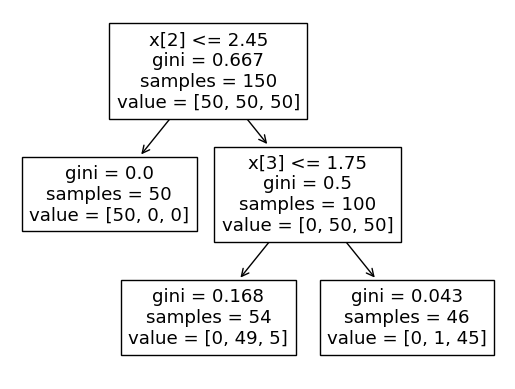

In [4]:
from sklearn import tree

tree.plot_tree(dtc)

In [3]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=2, n_estimators=50)  # 50 weak learners
rfc.fit(x, y)
y_pred = rfc.predict(x)
rfc.score(x, y)


0.9733333333333334

## 7.11 Exercises

DecisionTree with features [0, 1] has a score of 0.8133333333333334
RandomForest with 30 estimators with features [0, 1] has a score of 0.9266666666666666
ExtraTrees with 30 estimators with features [0, 1] has a score of 0.9266666666666666
AdaBoost with 30 estimators with features [0, 1] has a score of 0.82
DecisionTree with features [0, 2] has a score of 0.9533333333333334
RandomForest with 30 estimators with features [0, 2] has a score of 0.9933333333333333
ExtraTrees with 30 estimators with features [0, 2] has a score of 0.9933333333333333
AdaBoost with 30 estimators with features [0, 2] has a score of 0.9933333333333333
DecisionTree with features [2, 3] has a score of 0.9733333333333334
RandomForest with 30 estimators with features [2, 3] has a score of 0.9933333333333333
ExtraTrees with 30 estimators with features [2, 3] has a score of 0.9933333333333333
AdaBoost with 30 estimators with features [2, 3] has a score of 0.9866666666666667


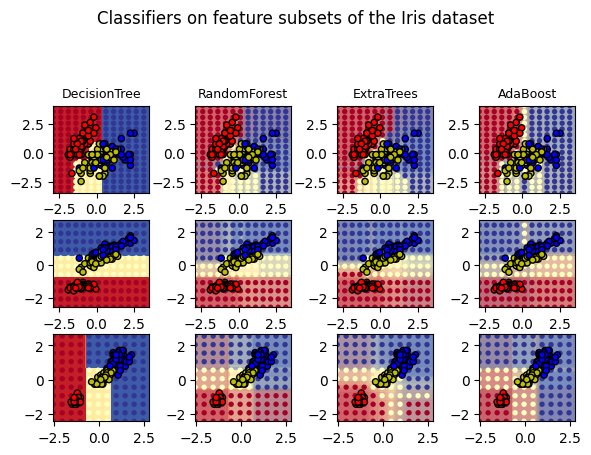

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn.ensemble import (
    AdaBoostClassifier,
    ExtraTreesClassifier,
    RandomForestClassifier,
)
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
n_estimators = 50
cmap = plt.cm.RdYlBu
plot_step = 0.02  # fine step width for decision surface contours
plot_step_coarser = 0.5  # step widths for coarse classifier guesses
RANDOM_SEED = 13  # fix the seed on each iteration


plot_idx = 1

models = [
    DecisionTreeClassifier(max_depth=3),
    RandomForestClassifier(n_estimators=n_estimators),
    ExtraTreesClassifier(n_estimators=n_estimators),
    AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=3),
        n_estimators=n_estimators,
        algorithm="SAMME",
    ),
]

for pair in ([0, 1], [0, 2], [2, 3]):
    for model in models:
        # We only take the two corresponding features
        X = iris.data[:, pair]
        y = iris.target

        # Shuffle
        idx = np.arange(X.shape[0])
        np.random.seed(RANDOM_SEED)
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]

        # Standardize
        mean = X.mean(axis=0)
        std = X.std(axis=0)
        X = (X - mean) / std

        # Train
        model.fit(X, y)

        scores = model.score(X, y)
        # Create a title for each column and the console by using str() and
        # slicing away useless parts of the string
        model_title = str(type(model)).split(".")[-1][:-2][: -len("Classifier")]

        model_details = model_title
        if hasattr(model, "estimators_"):
            model_details += " with {} estimators".format(len(model.estimators_))
        print(model_details + " with features", pair, "has a score of", scores)

        plt.subplot(3, 4, plot_idx)
        if plot_idx <= len(models):
            # Add a title at the top of each column
            plt.title(model_title, fontsize=9)

        # Now plot the decision boundary using a fine mesh as input to a
        # filled contour plot
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(
            np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
        )

        # Plot either a single DecisionTreeClassifier or alpha blend the
        # decision surfaces of the ensemble of classifiers
        if isinstance(model, DecisionTreeClassifier):
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            cs = plt.contourf(xx, yy, Z, cmap=cmap)
        else:
            # Choose alpha blend level with respect to the number
            # of estimators
            # that are in use (noting that AdaBoost can use fewer estimators
            # than its maximum if it achieves a good enough fit early on)
            estimator_alpha = 1.0 / len(model.estimators_)
            for tree in model.estimators_:
                Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
                Z = Z.reshape(xx.shape)
                cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)

        # Build a coarser grid to plot a set of ensemble classifications
        # to show how these are different to what we see in the decision
        # surfaces. These points are regularly space and do not have a
        # black outline
        xx_coarser, yy_coarser = np.meshgrid(
            np.arange(x_min, x_max, plot_step_coarser),
            np.arange(y_min, y_max, plot_step_coarser),
        )
        Z_points_coarser = model.predict(
            np.c_[xx_coarser.ravel(), yy_coarser.ravel()]
        ).reshape(xx_coarser.shape)
        cs_points = plt.scatter(
            xx_coarser,
            yy_coarser,
            s=15,
            c=Z_points_coarser,
            cmap=cmap,
            edgecolors="none",
        )

        # Plot the training points, these are clustered together and have a
        # black outline
        plt.scatter(
            X[:, 0],
            X[:, 1],
            c=y,
            cmap=ListedColormap(["r", "y", "b"]),
            edgecolor="k",
            s=20,
        )
        plot_idx += 1  # move on to the next plot in sequence

plt.suptitle("Classifiers on feature subsets of the Iris dataset", fontsize=12)
plt.axis("tight")
plt.tight_layout(h_pad=0.2, w_pad=0.2, pad=2.5)
plt.show()